<a href="https://colab.research.google.com/github/jacobletsinger/MAT422/blob/main/HW3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.7 Artificial Neural networks


### 3.7.1. Mathematical formulation

### 3.7.2. Activation functions

### 3.7.3. Cost function

### 3.7.4. Backpropagation

### 3.7.5. Backpropagation algorithm

### 3.7.1. Mathematical formulation

In [18]:
import numpy as np

# Input data (e.g., 2 samples, 3 features each)
X = np.array([[0.5, 0.2, 0.1], [0.9, 0.8, 0.4]])

# Initialize weights and biases
W1 = np.random.rand(3, 4)  # Weights for the hidden layer
b1 = np.random.rand(1, 4)  # Biases for the hidden layer
W2 = np.random.rand(4, 1)  # Weights for the output layer
b2 = np.random.rand(1, 1)  # Biases for the output layer

# Compute the forward pass
hidden_layer_input = np.dot(X, W1) + b1
print("Hidden Layer Input:\n", hidden_layer_input)

Hidden Layer Input:
 [[0.56741846 0.14858834 1.219859   1.38614203]
 [1.30637049 0.3977041  1.75458376 2.21277205]]


### 3.7.2. Activation functions


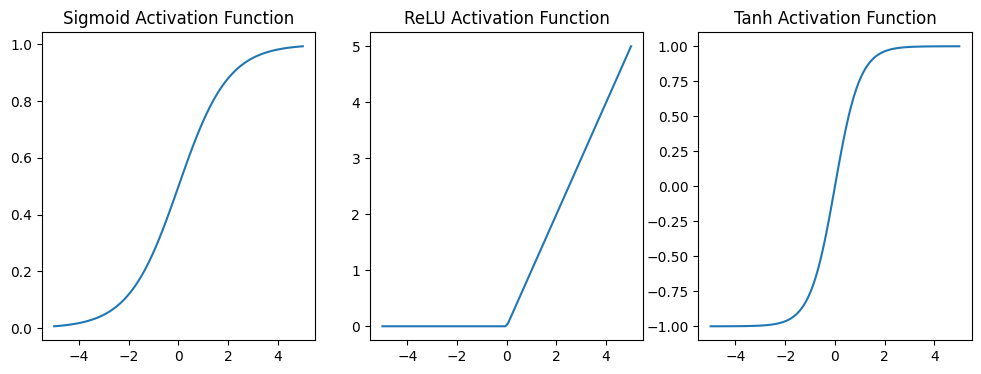

In [17]:
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def tanh(x):
    return np.tanh(x)

# Plot the activation functions
x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.title("Sigmoid Activation Function")

plt.subplot(1, 3, 2)
plt.plot(x, relu(x), label='ReLU')
plt.title("ReLU Activation Function")

plt.subplot(1, 3, 3)
plt.plot(x, tanh(x), label='Tanh')
plt.title("Tanh Activation Function")

plt.show()

### 3.7.3. Cost function


In [19]:
# Define Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mse_derivative(y_true, y_pred):
    return (y_pred - y_true) / y_true.size

# Example data
y_true = np.array([1, 0, 1])
y_pred = np.array([0.9, 0.4, 0.2])
cost = mean_squared_error(y_true, y_pred)
print("Mean Squared Error:", cost)

Mean Squared Error: 0.2700000000000001


### 3.7.4. Backpropagation


In [20]:
# Sample data
X = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])  # shape (2, 4)
y_true = np.array([[10], [15]])             # shape (2, 1) to match y_pred

# Initial weights and bias
W1 = np.random.randn(4, 1)                  # shape (4, 1)
b1 = np.random.randn(1)                     # shape (1,)

def backpropagation_example(X, y_true, W, b):
    y_pred = np.dot(X, W) + b               # y_pred shape (2, 1)
    error = y_pred - y_true                 # Error shape (2, 1)
    dW = np.dot(X.T, error) / X.shape[0]    # Gradient with respect to W
    db = np.mean(error, axis=0)             # Gradient with respect to b
    return dW, db

# Example usage
dW, db = backpropagation_example(X, y_true, W1, b1)
print("dW:", dW)
print("db:", db)

dW: [[ -88.17929494]
 [-113.02587564]
 [-137.87245635]
 [-162.71903705]]
db: [-24.8465807]


### 3.7.5. Backpropagation algorithm

In [21]:
# Sample data (for demonstration purposes)
X = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])  # Input features
y_true = np.array([[0], [1]])               # Target values for binary classification

# Initialize weights and biases
W1 = np.random.randn(4, 3)  # First layer weights (4 input features to 3 hidden neurons)
b1 = np.random.randn(3)     # First layer biases (for 3 hidden neurons)
W2 = np.random.randn(3, 1)  # Second layer weights (3 hidden neurons to 1 output neuron)
b2 = np.random.randn(1)     # Second layer bias (for 1 output neuron)

# Backpropagation algorithm function
def backpropagation_algorithm(X, y_true, W1, b1, W2, b2, learning_rate=0.01):
    # Forward pass
    hidden_layer_input = np.dot(X, W1) + b1
    hidden_layer_output = relu(hidden_layer_input)
    output_layer_input = np.dot(hidden_layer_output, W2) + b2
    y_pred = sigmoid(output_layer_input)

    # Compute loss
    loss = mean_squared_error(y_true, y_pred)
    print("Loss:", loss)

    # Backward pass
    # Compute gradients for output layer
    output_error = mse_derivative(y_true, y_pred) * sigmoid_derivative(output_layer_input)
    dW2 = np.dot(hidden_layer_output.T, output_error)
    db2 = np.sum(output_error, axis=0)

    # Compute gradients for hidden layer
    hidden_error = np.dot(output_error, W2.T) * relu_derivative(hidden_layer_input)
    dW1 = np.dot(X.T, hidden_error)
    db1 = np.sum(hidden_error, axis=0)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

# Example usage
W1, b1, W2, b2 = backpropagation_algorithm(X, y_true, W1, b1, W2, b2)
print("Updated W1:", W1)
print("Updated b1:", b1)
print("Updated W2:", W2)
print("Updated b2:", b2)

Loss: 0.29097711797613596
Updated W1: [[-1.12059076 -1.43454145  0.06185761]
 [-0.64689648 -0.47400827  1.8989835 ]
 [-1.72186006  1.61960807 -0.94120913]
 [-0.46497501 -1.35575099 -0.5616014 ]]
Updated b1: [ 1.25624531 -1.84082576 -0.44104699]
Updated W2: [[ 0.7794519 ]
 [-0.53161732]
 [-0.46068766]]
Updated b2: [-0.64836215]
